In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read and plot data

In [2]:
data = pd.read_csv("NFLX.csv")
display(data)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


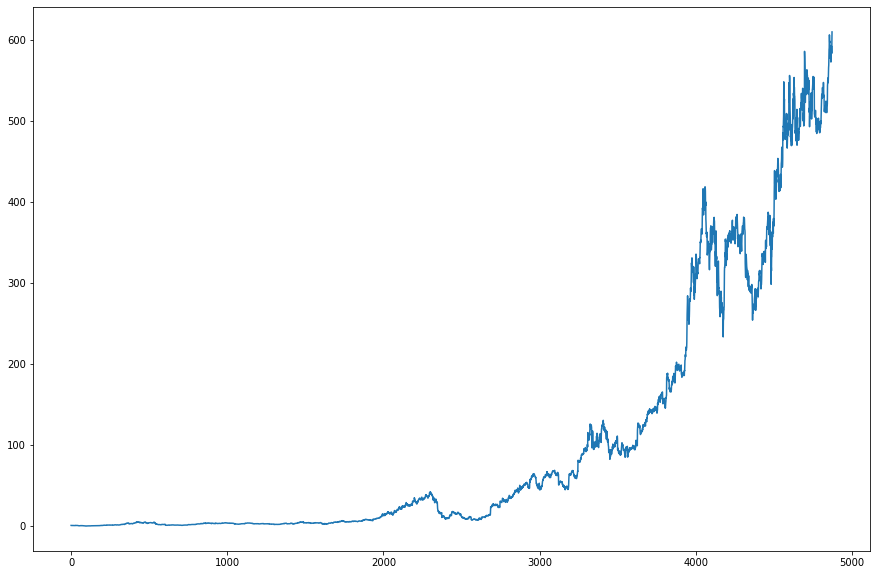

In [3]:
plt.figure(figsize=(15, 10))
plt.plot(data.index, data["Close"])
plt.show()
# data.plot("Date", "Close", figsize=(12, 7))

## Separate data (TT - 80/20)

In [4]:
train, test = np.split(data, [int(.8*len(data))])
display(train)
display(test)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
3894,2017-11-08,196.000000,197.089996,194.740005,196.440002,196.440002,4237400
3895,2017-11-09,194.460007,194.490005,190.809998,193.899994,193.899994,5979900
3896,2017-11-10,191.610001,192.589996,189.500000,192.020004,192.020004,6622200
3897,2017-11-13,191.119995,196.050003,191.000000,195.080002,195.080002,4607000


,Date,Open,High,Low,Close,Adj Close,Volume
3899,2017-11-15,194.539993,195.419998,191.529999,192.119995,192.119995,4203100
3900,2017-11-16,194.330002,197.699997,193.750000,195.509995,195.509995,5678400
3901,2017-11-17,195.740005,195.949997,192.649994,193.199997,193.199997,3906300
3902,2017-11-20,193.300003,194.320007,191.899994,194.100006,194.100006,3827500
3903,2017-11-21,195.039993,197.520004,194.970001,196.229996,196.229996,4787300
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


## Linear and quadratic estimations

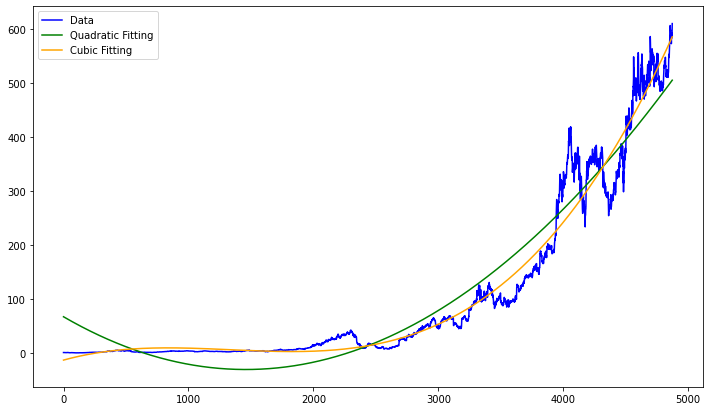

In [5]:
# Linear estimation
coefs = np.polyfit(data.index, np.array(data["Close"]), 1)
linVals = np.polyval(coefs, data.index)
linTS = pd.Series(data=linVals, index=data["Date"], name="Linear Fitting")

# Quadratic estimation
coefs = np.polyfit(data.index, np.array(data["Close"]), 2)
quadVals = np.polyval(coefs, data.index)
quadTS = pd.Series(data=quadVals, index=data["Date"], name="Quadratic Fitting")

coefs = np.polyfit(data.index, np.array(data["Close"]), 3)
cubVals = np.polyval(coefs, data.index)
cubTS = pd.Series(data=cubVals, index=data["Date"], name="Cubic Fitting")

plt.figure(figsize=(12, 7))
plt.plot(data.index, data["Close"], color='blue', label="Data")
# plt.plot(data.index, linTS, color='red', label="Linear Fitting")
plt.plot(data.index, quadTS, color='green', label="Quadratic Fitting")
plt.plot(data.index, cubTS, color='orange', label="Cubic Fitting")
plt.legend()
plt.show()

## Removing linear and quadratic trends

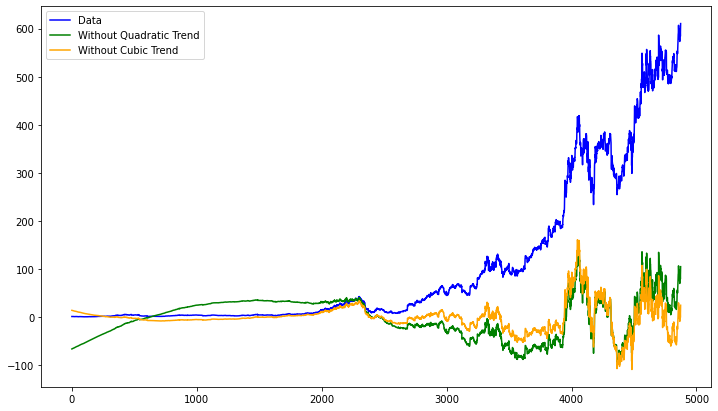

In [6]:
data_no_lin_trend = data["Close"].values - linTS.values
data_no_quad_trend = data["Close"].values - quadTS.values
data_no_cub_trend = data["Close"].values - cubTS.values

plt.figure(figsize=(12, 7))
plt.plot(data.index, data["Close"], color='blue', label="Data")
# plt.plot(data.index, data_no_lin_trend, color='red', label="Without Linear Trend")
plt.plot(data.index, data_no_quad_trend, color='green', label="Without Quadratic Trend")
plt.plot(data.index, data_no_cub_trend, color='orange', label="Without Cubic Trend")
plt.legend()
plt.show()

(array([253], dtype=int64),)


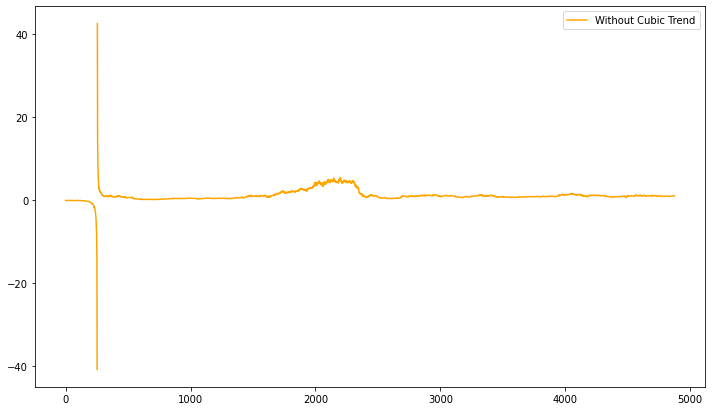

In [16]:
# data_no_lin_trend = data["Close"].values/linTS.values
data_no_quad_trend = data["Close"].values/quadTS.values
data_no_cub_trend = data["Close"].values/cubTS.values

indexes = np.where((data_no_cub_trend > (3 * np.std(data_no_cub_trend))) | (data_no_cub_trend < (-3 * np.std(data_no_cub_trend))))
print(indexes)
data_no_cub_trend[indexes] = np.nan
# data_no_cub_trend = data_no_cub_trend[]
 #print(len(data_no_cub_trend))

# print(f"Average: {np.mean(data_no_cub_trend)}, STD: {np.std(data_no_cub_trend)}")

plt.figure(figsize=(12, 7))
# plt.plot(data.index, data["Close"], color='blue', label="Data")
# plt.plot(data.index, data_no_lin_trend, color='red', label="Without Linear Trend")
# plt.plot(data.index, data_no_quad_trend, color='green', label="Without Quadratic Trend")
plt.plot(data.index, data_no_cub_trend, color='orange', label="Without Cubic Trend")
plt.legend()
plt.show()

## Moving Average

In [8]:
def maSmooth(TSeries, omega, data_aug=False):
    M = omega.shape[0]
    lag = int(np.floor((M - 1) / 2))
    
    if data_aug: #If smooted TS should have the same number of samples
        TSeriesAug = TSeries.append(np.flip(TSeries[-lag:]))
        TSeriesAug = np.flip(TSeries[0:lag]).append(TSeriesAug)
        
    else:
        TSeriesAug = TSeries
        
    nf = range(lag, TSeriesAug.size - lag)
    xf = np.zeros(TSeriesAug.size - 2 * (lag)).astype('float')
    for n in nf:
        xf[n - lag] = (1 / float(sum(omega))) * np.sum(np.multiply(TSeriesAug[n - lag:n + lag + 1], omega))
    xf = pd.Series(data=xf, index=TSeriesAug.index[lag:TSeriesAug.size - lag], name="Smoothed TS with M=" + str(M))
    
    return xf

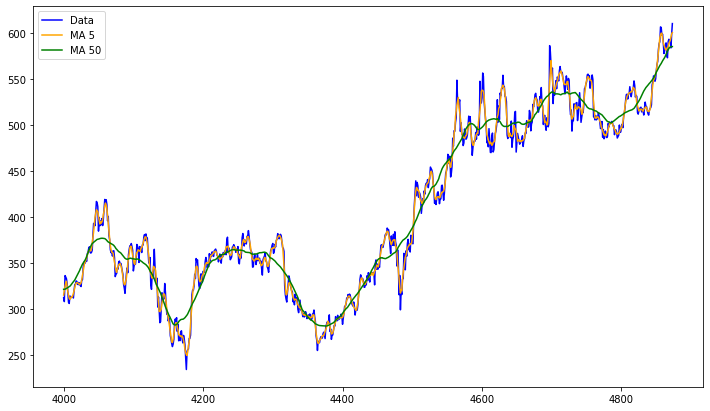

In [9]:
M = 5
omega = np.ones(M) * (1 / float(M))
smooth5 = maSmooth(data["Close"][4000:], omega, data_aug=True)

M = 21
omega = np.ones(M) * (1 / float(M))
smooth21 = maSmooth(data["Close"][4000:], omega, data_aug=True)

M = 51
omega = np.ones(M) * (1 / float(M))
smooth50 = maSmooth(data["Close"][4000:], omega, data_aug=True)

plt.figure(figsize=(12, 7))
plt.plot(data.index[4000:], data["Close"][4000:], color='blue', label="Data")
plt.plot(data.index[4000:], smooth5, color='orange', label="MA 5")
# plt.plot(data.index[4000:], smooth21, color='red', label="MA 21")
plt.plot(data.index[4000:], smooth50, color='green', label="MA 50")
plt.legend()
plt.show()